<a href="https://colab.research.google.com/github/Ahmed-Shatla/RBM-with-Fashion-MNIST-dataset/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neural_network import BernoulliRBM
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0],-1)/255
X_test = X_test.reshape(X_test.shape[0],-1)/255

In [4]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [5]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

In [7]:
model = Sequential()

model.add(Dense(units=128,input_shape=(784,),activation='relu'))

model.add(Dense(units=512,activation='relu'))

model.add(Dense(units=128,activation='relu'))

model.add(Dense(38,activation = 'softmax'))



model.add(Dense(10,activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 512)               66048     
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 38)                4902      
                                                                 
 dense_4 (Dense)             (None, 10)                390       
                                                                 
Total params: 237,484
Trainable params: 237,484
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [9]:
history = model.fit(X_train,y_train,batch_size=32,epochs=20,verbose=1,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 16s 9ms/step - loss: 1.5967 - accuracy: 0.4300 - val_loss: 1.2871 - val_accuracy: 0.4678
Epoch 2/20
1688/1688 [==============================] - 9s 5ms/step - loss: 1.1765 - accuracy: 0.4942 - val_loss: 1.0551 - val_accuracy: 0.5835
Epoch 3/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.9228 - accuracy: 0.6397 - val_loss: 0.8399 - val_accuracy: 0.6713
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.8000 - accuracy: 0.6645 - val_loss: 0.7670 - val_accuracy: 0.6855
Epoch 5/20
1688/1688 [==============================] - 9s 6ms/step - loss: 0.7291 - accuracy: 0.7345 - val_loss: 0.6924 - val_accuracy: 0.7683
Epoch 6/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.6198 - accuracy: 0.8080 - val_loss: 0.5653 - val_accuracy: 0.8440
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5008 - accuracy: 0.8608 - val_loss: 0.4776 - val_accuracy

Text(0.5, 0, 'epochs')

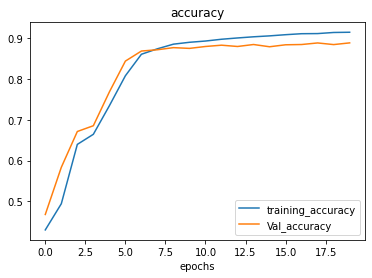

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

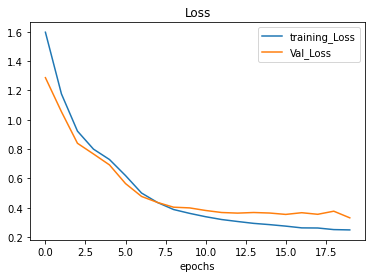

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8877


[0.33478665351867676, 0.8877000212669373]